Let's check the labellings

In [10]:
from tools import get_data_file
from glob import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [11]:
class_file = get_data_file('raw', 'annotations/classes.txt')
annotation_files = set(glob(get_data_file('raw','annotations/*.txt')))
annotation_files.remove(class_file)

In [12]:
with open(class_file) as readable:
    classes = pd.DataFrame([[i, class_.strip()] for i, class_ in enumerate(readable)], columns = ['class_id', 'class_name']).set_index('class_id')
print(classes)

               class_name
class_id                 
0               valentina
1                tamazula
2         valentina-negra
3              botaneraaa


In [13]:
in_collection = []
for annotation_file in annotation_files:
    base_path = os.path.basename(annotation_file)
    name, extension = os.path.splitext(base_path)
    with open(annotation_file) as r:
        in_file = []
        for line in r:
            values = []
            string_values = line.split()
            values.append(name)
            values.append(int(string_values[0]))
            values.extend([float(f) for f in string_values[1:]])
            in_file.append(values)
    in_collection.extend(in_file)

The YOLO format is `class_index | center x | center y | width | height`, all the float quantities are relative to the size of the image, they go from 0 to 1. 

In [14]:
labels = pd.DataFrame(in_collection, columns=['file', 'class_code', 'x1', 'y1', 'width', 'height'])
labels['class_code'].value_counts()

0    260
2     78
1     17
3      1
Name: class_code, dtype: int64

In [190]:
def get_image_path(image):
    image = get_data_file('raw', f'images/{image}')
    jpg = image + ".jpg"
    if os.path.exists(jpg):
        return jpg
    jpeg = image + ".jpeg"
    if os.path.exists(jpeg):
        return jpeg
    png = image + ".png"
    if os.path.exists(png):
        return png

In [202]:
def from_yolo_to_cor(record, shape):
    width, height = shape
    x_rect = (record['x1'] - record['width']/2) * width
    y_rect = (record['y1'] - record['height']/2) * height
    width_rect = record['width']* width
    height_rect = record['height']* height
    return x_rect, y_rect, width_rect, height_rect

In [207]:
def show_images(frame, ax):
    record = frame.iloc[0]
    image = Image.open(get_image_path(record['file']))
    ax.imshow(image)
    for i, record in frame.iterrows():
        x_rect, y_rect, width_rect, height_rect = from_yolo_to_cor(record, image.size)
        rect = patches.Rectangle((x_rect,y_rect),width_rect,height_rect,linewidth=5,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

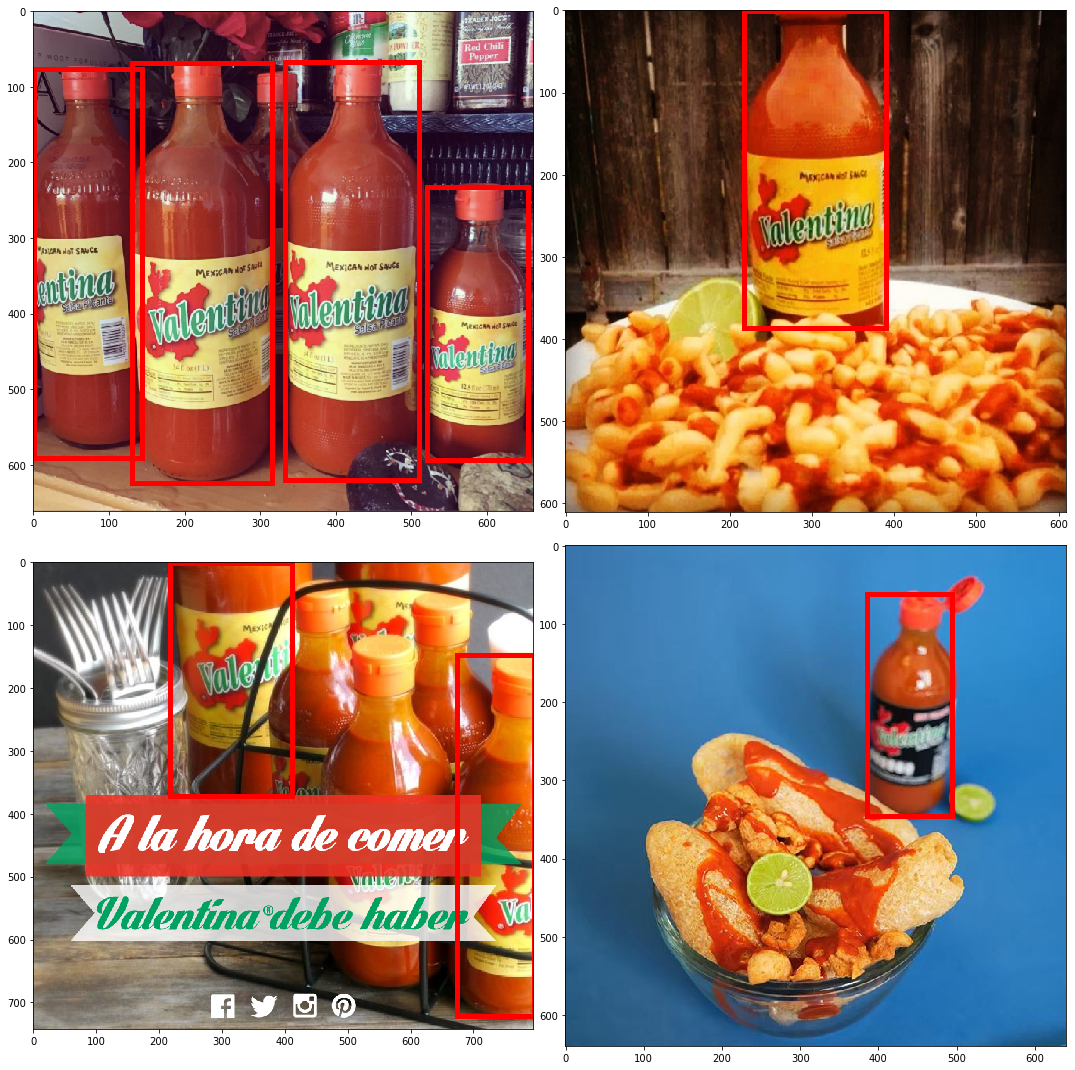

In [215]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,15))
show_images(labels.query("file == '22007612_1685751551499815_8558103399201880247_n'"), ax1)
show_images(labels.query("file == '1908234_588373041237677_757814605_n'"), ax2)
show_images(labels.query("file == '1378024_528478377227144_1884094119_n'"), ax3)
show_images(labels.query("file == '60839988_2383493471873859_745013920838968223_n'"), ax4)
plt.tight_layout()